##  Pythonで地図を表示するサンプル

In [ ]:
%matplotlib inline

import sympy as sy
import folium
import numpy as np
from IPython.display import display, Math

# SymPy Plotting Backends (SPB)
from spb import plot, plot_implicit

# グラフを SVG で Notebook にインライン表示
# これは試し
%config InlineBackend.figure_formats = ['svg']

# おまじない
sy.init_printing()

m = folium.Map(location=[35, 139], zoom_start=5)
folium.Marker(location=[35,139],popup='Tokyo').add_to(m)
folium.CircleMarker(
    location=[34.6937, 135.5022],
    radius=10,
    color='#ff0000',
    fill_color='#0000ff'
).add_to(m)
display(m)



## NNによる最適値の探索　（未完成）

In [ ]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


def firster(nb_input_classes = 3, nb_output_classes=1) :

    input_data = tf.keras.Input(shape=(nb_input_classes,))

    layers = [  tf.keras.layers.Dense(nb_input_classes, activation='relu'),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Flatten(),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dense(nb_output_classes) ]
    
    # Opt
    opt = tf.keras.optimizers.Adam(lr=1e-4)

    x = layers[0](input_data)
    for layer in layers[1:] :
      x = layer(x)
  
    model = tf.keras.Model(input_data, x)

    model.summary()

    model.compile(optimizer=opt, loss='logcosh', metrics=['logcosh'])

    return model
  
def run_case() :
    
    """
    test code for auto encoder decoder model 
    """

    import libs.regression_data as rg

    obj = rg.regression_data()
    x, y = obj.get_data()

    in_c, out_c = 3, 1
    batch_size, nb_epoch = 5, 10
    
    model = firster(in_c, out_c)
    scores = model.fit(x, y, batch_size = batch_size, epochs = nb_epoch, validation_data = (x, y), verbose = 1)
    L = model.layers
    print("Dense weight = ", L[3].weights)
    predict_results = model.predict(x)
    print("Presict = ", predict_results)
    for i in range(predict_results.shape[0]) :
        print("Diff --> ", i, " : ", y[i] - predict_results[i])
    
run_case()

## 再急降下法

$  例　：　f(a_{1}, a_{2}) = \{ y_{i} - (a_1{1}x_{1i} + a_{2}x_{2i}) \} ^ 2 　 \longrightarrow　0  $

In [ ]:
import sympy as sy
from sympy.vector import CoordSys3D, gradient
import numpy as np
from spb import *
import numpy as np
from IPython.display import display, Math

# グラフを SVG で Notebook にインライン表示
%config InlineBackend.figure_formats = ['svg']

# LaTeXで数式を表示
sy.init_printing()

x, y, z, a, b = sy.symbols('x y z a b')
f = (z - (a*x + b*y))**2
D = sy.Matrix([sy.diff(f, a), sy.diff(f, b)])
display(Math(sy.latex(D)))

##  迷路を使用して強化学習を学ぶ

[強化学習で迷路問題を触る](https://qiita.com/Ringa_hyj/items/b148da6335af625f1f4a) 
[anytreeの使い方](https://qiita.com/maskot1977/items/f775ea6e32b400dc591e)  





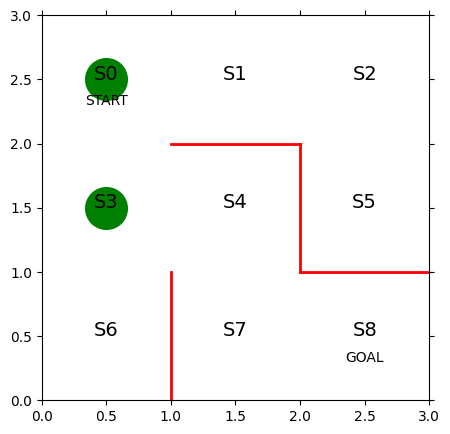

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 初期位置での迷路の様子
# 図を描く大きさと、図の変数名を宣言
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 赤い壁を描く
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)
# 状態を示す文字S0～S8を描く
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')
# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')
# 現在地S0に緑丸を描画する
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=30)
line, = ax.plot([0.5], [1.5], marker="o", color='g', markersize=30)

